<a href="https://colab.research.google.com/github/there-exist/thereexist_/blob/master/2019_11_27_Green's_function_for_poisson_process.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import library

import numpy as np
import matplotlib.pyplot as plt

(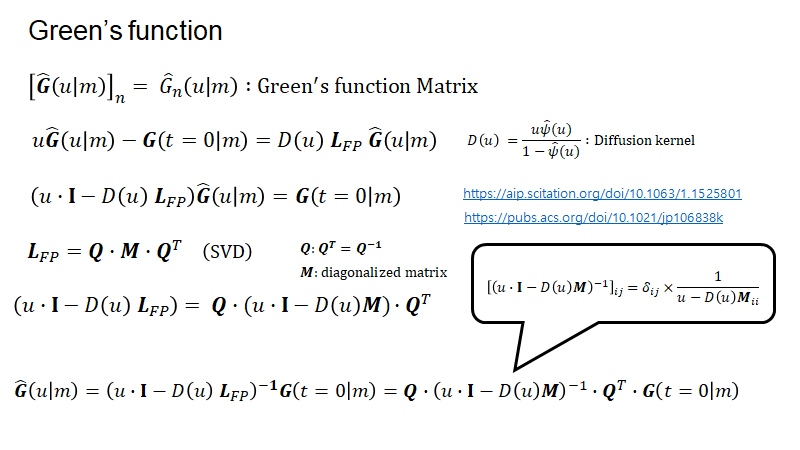))

대략적인 알고리즘의 형태는 다음과 같다.

Matrix $Q$와 $M$은 이미 논문에 그 값이 주어졌기에, 그것을 활용하면 된다.
(https://aip.scitation.org/doi/10.1063/1.1525801, https://pubs.acs.org/doi/10.1021/jp106838k)

**1. 각 Matrix 정의하기**

In [0]:
'''
Q라고 이름을 기입했더니 Question을 의미하는 용어와 혼동을 빚어 이후에 문제가 생겼다.(total_tensor를 만들 때)
그래서 이름을 Qu로 바꿨다.

때로는 이름을 어떻게 기입하는지가 중요한 모양이다.
'''
'''
Qu(N)

Size : (N+1 x N+1)

'''

def Qu(N):
  Qu = np.zeros((N+1,N+1))

  for i in range(0,N+1):
    for k in range(0,N+1):
        
      if k == 0:

        Qu[i,k] = np.sqrt(1/(N+1))*np.cos((i+0.5)*k*np.pi/(N+1))

      else:

        Qu[i,k] = np.sqrt(2/(N+1))*np.cos((i+0.5)*k*np.pi/(N+1))

  return Qu

In [0]:
'''
M(N)

Size : (N+1 x N+1)

'''
def M(N):

  M = np.zeros((N+1,N+1))

  for i in range(0,N+1):
    for k in range(0,N+1):

      if i == k:

        M[i,k] = -4 * (np.sin(k*np.pi / (2*(N+1))))**2

  
  return M

In [0]:
'''
round 처리를 하지 않으면, 0에 근사한 값이어도 0으로 안나오고, E-17 등의 order로 나타난다.

'''
def L_FP(N):
  return np.round(np.dot(Qu(N),np.dot(M(N),Qu(N).T)),5)


$\hat\psi(u)$ 의 형태는 여기에서 바꾸면 된다. 지금은 Poisson process의 경우를 다뤘다.

( $\psi(t) = ke^{-kt}$ )

In [0]:
def hat_psi(u,k):
  return k / (k+u)

In [0]:
def D(u,k):  
  psi = hat_psi(u,k)
  return u*psi / (1-psi)

이제 필요한 것들을 모두 구했기에,

$G(t=0,m)$ 앞에 붙는 Matrix operator를 만들어 주면 된다.

이 전체 matrix ( $Q (uI - D(u)M)^{-1}$ ) 을 Operator matrix로 선언했다.

In [0]:
def operator_matrix(N, u, k):

  qu = Qu(N)
  m = M(N)
  d = D(u,k)

  Diagonalized_Matrix = np.zeros((N+1,N+1))
  
  for i in range(0,N+1):
    Diagonalized_Matrix[i,i] = (u - d*m[i,i])**-1
  
  result = np.dot(qu, np.dot(Diagonalized_Matrix, qu.T))

  return result


$G(t=0,m)$ matrix는 $(N+1,1)$ 꼴의 형태를 갖는다.

$[G(t=0,m)]_{n,m} = \delta_{nm}$ 이다.


In [0]:
def G_0(m, N):

  result = np.zeros((N+1,1))

  result[m,0] = 1

  return result

$\hat G(u,m)$를 구할 모든 준비를 마쳤다. 이제 이를 구현해보면 된다.

In [0]:
def Green_matrix (m, N, u, k):

  A = operator_matrix(N, u, k)
  x = G_0(m, N)

  result = np.dot(A,x)

  return result

In [0]:
'''
n = measured position
m = initial position
N = upper boundary
u = laplace space
k = related with hat_psi value. This variable can be replaced by another value
    depending on the jumping process
'''

def Green_function(n, m, N, u, k):

  return Green_matrix (m, N, u, k)[n,0]
  

In [48]:
print(type(Green_function))

<class 'function'>


<class 'numpy.ndarray'>
<class 'function'>


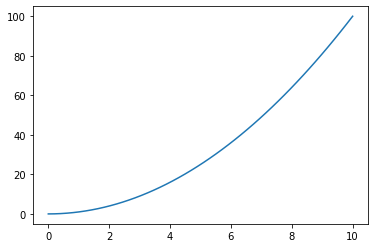

In [51]:
x = np.linspace(0,10)

def y(x):
  return x**2

plt.plot(x,y(x))

print(type(x))
print(type(y))

Green function을 직접 대입하려고 하면 오류가 생긴다. 

따라서 이를 다시 array로 만들어서 그래프를 그리는 작업을 진행했다. 

이후에 이를 수정해야 될 것이다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


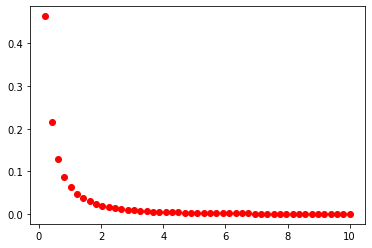

[nan, 0.4631983103914388, 0.21492983322024967, 0.12982215785483756, 0.08778335618067022, 0.06337335694001617, 0.04779949090625373, 0.03721936494627352, 0.02969817526603233, 0.024163314541643884, 0.01997697081033242, 0.016738963900321875, 0.0141872853310287, 0.012144328881701272, 0.01048616700712855, 0.00912417968906232, 0.007993643804631982, 0.007046412897217747, 0.006246088309584982, 0.005564755394521211, 0.004980729821238616, 0.004476971502369861, 0.004039949223207761, 0.0036588153565136113, 0.003324797593423883, 0.0030307449246932687, 0.0027707848169958205, 0.002540061588185136, 0.002334534784719684, 0.0021508223856580764, 0.001986077836733458, 0.0018378928568626026, 0.0017042200513641564, 0.0015833108721245114, 0.001473665560550192, 0.0013739925140753187, 0.0012831751138379407, 0.0012002444975328693, 0.0011243570980425809, 0.0010547760242010822, 0.0009908555557860748, 0.0009320281756735186, 0.0008777936790820675, 0.0008277099911383078, 0.0007813853956654748, 0.0007384719346747787, 

In [60]:
U = np.linspace(0,10)

Ga = []

for i in U:

  G = Green_function(n = 3, m = 5, N = 10, u = i, k = 1)
  Ga.append(G)

  plt.plot(i,G, 'ro')

plt.show()

print(Ga)



첫 숫자가 nan이 나와서 문제가 생기는 것 같다.

U = 0 의 경우에는 결과가 나오지 않는 것 같다.

최근에 try: except: 문법에 대해 배웠으니 이를 바로 적응해보자 -> 실패

우선은 Graph를 그리기 위한 모든 준비를 마쳤다. 

이를 G_graph function으로 define했다.

In [0]:
def G_graph(u_initial, u_final, slicing_number, n, m, N, k):
  
  U = np.linspace(u_initial,u_final,slicing_number)

  Ga = []

  for i in U:

    G = Green_function(n, m, N, i, k)
    Ga.append(G)
 

  return U, Ga

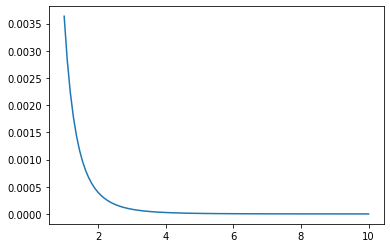

In [130]:
U, Ga = G_graph(u_initial = 1, u_final = 10, slicing_number = 100, n = 45, m = 50, N = 100, k = 1)

plt.plot(U,Ga)

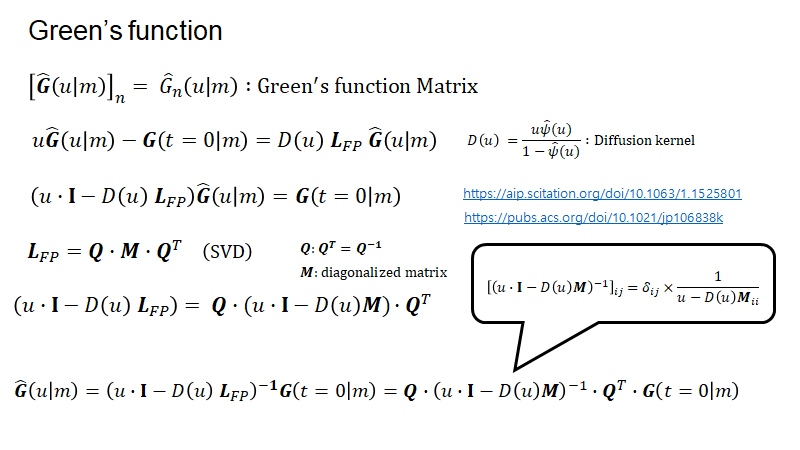

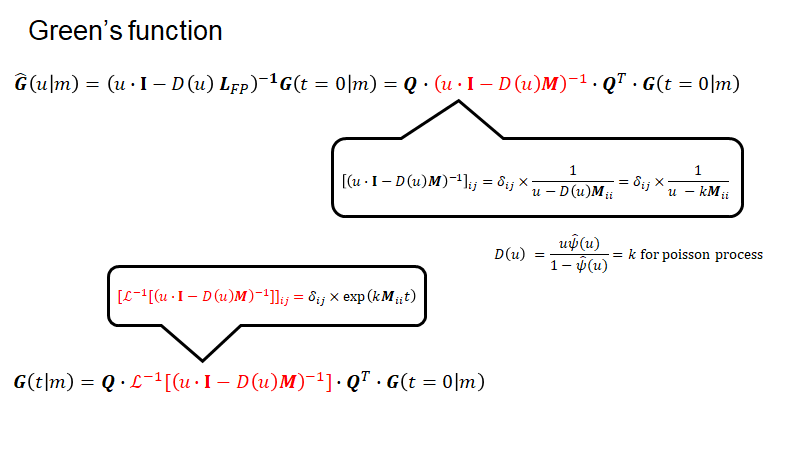

특별히 poisson process에 대해서는 time space에서의 

Green's function을 구하는 것이 쉽다.

이를 바로 적용해보자


In [0]:
def time_space_operator_matrix(N, t, k):

  qu = Qu(N)
  m = M(N)

  Diagonalized_Matrix = np.zeros((N+1,N+1))
  
  for i in range(0,N+1):
    Diagonalized_Matrix[i,i] = np.exp(k*m[i,i]*t)
  
  result = np.dot(qu, np.dot(Diagonalized_Matrix, qu.T))

  return result


In [0]:
def time_space_Green_matrix (m, N, t, k):

  A = time_space_operator_matrix(N, t, k)
  x = G_0(m, N)

  result = np.dot(A,x)

  return result

In [0]:
'''
n = measured position
m = initial position
N = upper boundary
t = time
k = related with hat_psi value. This variable can be replaced by another value
    depending on the jumping process
'''

def time_space_Green_function(n, m, N, t, k):

  return time_space_Green_matrix (m, N, t, k)[n,0]

In [0]:
def time_space_G_graph(t_initial, t_final, slicing_number, n, m, N, k):
  
  T = np.linspace(t_initial,t_final,slicing_number)

  Ga_t = []

  for i in T:

    G = time_space_Green_function(n, m, N, i, k )
    Ga_t.append(G)
 

  return T, Ga_t

n = 10


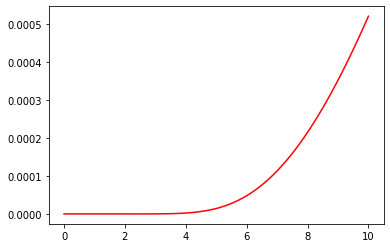

n = 20


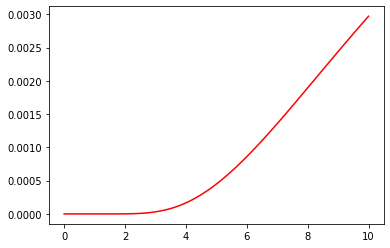

n = 30


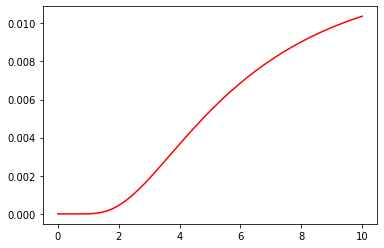

n = 40


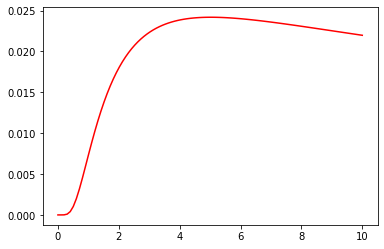

n = 50


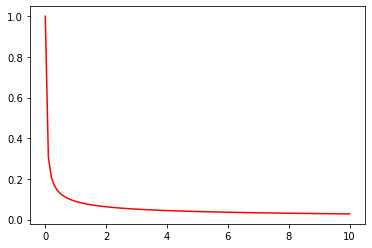

In [129]:
for i in range(1,6):
  T, Ga_t = time_space_G_graph(t_initial = 0, t_final = 10, slicing_number = 100, n = 10*i, m = 50, N = 100, k = 10)

  plt.plot(T,Ga_t, 'r')
  print('n =', 10*i)
  plt.show()

엉성한 code이지만, poisson process에서 Green's function을 

laplace domain과 time domain에서 둘다 그려봤다.

결과는 성공적이라고 볼 수 있다.